In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]
import random
import sys
import seaborn as sns
import pandas as pd
import prelim_fig_funcs

# make sure you have "binAges_HUMAN.csv" from the google drive
# then run "preprocess/convert_multiple_gene_age_data_into_dict.py"
# then make sure you have "data/function_to_genes_all_in_simplified.p" from the google drive
# then run "save_function_to_age_pickle.py with the data from multiple datasets setting
# to get the pickle files we'll be using 

dataset_to_gene_to_age_dict = pickle.load(open("data/dataset_to_gene_to_age_dict.p","rb"))  
dataset_list = dataset_to_gene_to_age_dict.keys()
print dataset_list

['PANTHER8_all', 'EggNOG', 'InParanoidCore', 'Hieranoid_2', 'RSD', 'OMA_Groups', 'Orthoinspector', 'OMA_Pairs', 'PhylomeDB', 'Metaphors', 'InParanoid', 'PANTHER8_LDO', 'EnsemblCompara_v2']


In [2]:
# FUNCTION GROUPED
functions_dict = {}
means_dict = {}
stds_dict = {}
lens_dict = {}
ages_dict = {}

for dataset in dataset_list:
    ages_list = []
    for gene in dataset_to_gene_to_age_dict[dataset]:
        ages_list.append(dataset_to_gene_to_age_dict[dataset][gene])
    ages_list = np.array(ages_list)
    ages_dict[dataset] = ages_list[ages_list != np.array(None)]
    
for dataset in dataset_list:
    function_to_age_dict = pickle.load(open("data/function_to_age_%s_dict.p"%dataset,"rb"))
    function_list, mean_list, std_list, len_list = prelim_fig_funcs.get_function_grouped_age_data(function_to_age_dict)
    functions_dict[dataset] = function_list
    means_dict[dataset] = mean_list
    stds_dict[dataset] = std_list
    lens_dict[dataset] = len_list
    
# RANDOM
# am doing this seperately for each dataset, even though each should be super similar
# and would be faster to do for just one dataset and use it overall
rand_means_dict = {}
rand_stds_dict = {}
for dataset in dataset_list:
    rand_means_list, rand_stds_list = prelim_fig_funcs.get_random_grouped_age_data(lens_dict[dataset],ages_dict[dataset])
    rand_means_dict[dataset] = rand_means_list
    rand_stds_dict[dataset] = rand_stds_list
    


PANTHER8_all
<6 WilcoxonResult(statistic=11369.5, pvalue=1.9920887909758637e-66)
<10 WilcoxonResult(statistic=14645.5, pvalue=1.1164762855446176e-70)
<25 WilcoxonResult(statistic=13316.5, pvalue=1.0038976892996346e-73)
Largest WilcoxonResult(statistic=9798.0, pvalue=2.0684334226136245e-79)


prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%mq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type'

EggNOG
<5 WilcoxonResult(statistic=17028.5, pvalue=1.5479315268306825e-27)
<9 WilcoxonResult(statistic=40189.5, pvalue=1.1763113770865959e-44)
<21 WilcoxonResult(statistic=29341.5, pvalue=1.768495258132771e-46)
Largest WilcoxonResult(statistic=16733.0, pvalue=2.436431614529514e-67)


prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%mq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type'

InParanoidCore
<5 WilcoxonResult(statistic=19424.5, pvalue=1.1394505595656481e-12)
<9

prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%mq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type'

 WilcoxonResult(statistic=46023.5, pvalue=2.5426769401046884e-41)
<24 WilcoxonResult(statistic=32104.5, pvalue=1.4331858102708413e-60)
Largest WilcoxonResult(statistic=12219.0, pvalue=9.28648316231766e-77)
Hieranoid_2
<6 WilcoxonResult(statistic=20026.0, pvalue=5.178289408424883e-49)
<10 WilcoxonResult(statistic=16951.5, pvalue=4.007980807287847e-66)
<25 WilcoxonResult(statistic=17818.0, pvalue=1.1022016330987513e-66)
Largest WilcoxonResult(statistic=15228.0, pvalue=2.963935921057122e-71)


prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%mq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type'

RSD
<6 WilcoxonResult(statistic=38583.5, pvalue=1.0199376414873827e-26)
<10 WilcoxonResult(statistic=29599.0, pvalue=2.3510676225468065e-44)
<25 WilcoxonResult(statistic=23891.0, pvalue=4.577925116421445e-55)
Largest WilcoxonResult(statistic=7371.0, pvalue=9.237410257879781e-85)


prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%mq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type'

OMA_Groups
<6 WilcoxonResult(statistic=37444.5, pvalue=2.624836934541526e-20)
<10 WilcoxonResult(statistic=30723.5, pvalue=3.683487434555552e-43)
<25 WilcoxonResult(statistic=20964.0, pvalue=7.483574718649567e-60)
Largest WilcoxonResult(statistic=11570.0, pvalue=8.909915415349893e-78)


prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%mq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type'

Orthoinspector
<6 WilcoxonResult(statistic=11764.0, pvalue=3.164150074026355e-65)
<10 WilcoxonResult(statistic=13535.0, pvalue=6.418320395779894e-73)
<25 WilcoxonResult(statistic=10186.0, pvalue=7.482604159555633e-79)
Largest WilcoxonResult(statistic=5799.0, pvalue=5.107030665982433e-89)


prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%mq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type'

OMA_Pairs
<5 WilcoxonResult(statistic=15261.0, pvalue=2.103740228236965e-20)
<9 WilcoxonResult(statistic=36184.5, pvalue=8.909374784845567e-52)
<24 WilcoxonResult(statistic=33242.5, pvalue=6.442825830234449e-58)
Largest WilcoxonResult(statistic=10655.0, pvalue=4.323699276459096e-80)


prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%mq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type'

PhylomeDB
<6 WilcoxonResult(statistic=8707.0, pvalue=1.33194764053147e-68)
<10 WilcoxonResult(statistic=12960.0, pvalue=8.738858746211848e-75)
<25 WilcoxonResult(statistic=6446.0, pvalue=2.7606520449397573e-90)
Largest WilcoxonResult(statistic=2382.0, pvalue=5.571595905864364e-94)


prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%mq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type'

Metaphors
<6 WilcoxonResult(statistic=12301.0, pvalue=1.6342090595602578e-62)
<10 WilcoxonResult(statistic=16314.0, pvalue=7.071874326782489e-68)
<25

prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%mq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type'

 WilcoxonResult(statistic=10820.5, pvalue=2.1809935227429366e-79)
Largest WilcoxonResult(statistic=5591.0, pvalue=2.9502167906386305e-89)
InParanoid
<5 WilcoxonResult(statistic=9710.0, pvalue=1.548827442179291e-30)
<9 WilcoxonResult(statistic=28871.0, pvalue=2.376536826008905e-62)
<24 WilcoxonResult(statistic=18864.0, pvalue=1.3917241182198879e-81)
Largest WilcoxonResult(statistic=4575.0, pvalue=4.8987984193911115e-92)


prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%mq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type'

PANTHER8_LDO
<5 WilcoxonResult(statistic=26043.0, pvalue=0.00035668240668259996)
<9 WilcoxonResult(statistic=51076.0, pvalue=1.2567706042093857e-34)
<24 WilcoxonResult(statistic=35715.0, pvalue=9.360542162691375e-57)
Largest WilcoxonResult(statistic=11295.0, pvalue=1.0963201148775762e-78)


prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%mq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type'

EnsemblCompara_v2
<5 WilcoxonResult(statistic=8110.5, pvalue=1.9798928790096807e-42)
<9 WilcoxonResult(statistic=15343.0, pvalue=6.09891977791639e-80)
<24 WilcoxonResult(statistic=14531.5, pvalue=2.4002822070307084e-79)
Largest WilcoxonResult(statistic=8070.0, pvalue=1.1318284268403136e-81)


prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%lq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%lq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%lq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type']=="Rand"][v_df["GeneSet"] == "<%d"%mq]["Std"])
prelim_fig_funcs.py:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print "<%d"%mq, stats.wilcoxon(v_df[v_df['Type']=="Func"][v_df["GeneSet"] == "<%d"%mq]["Std"], v_df[v_df['Type'

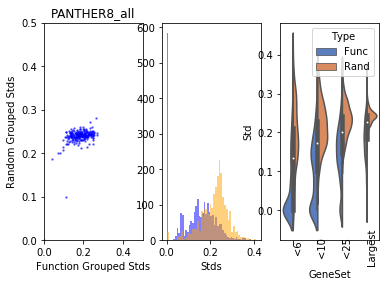

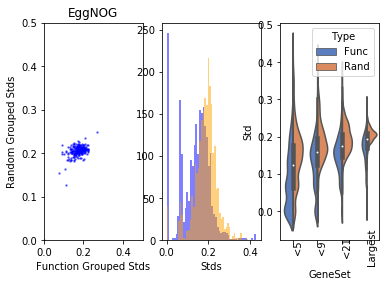

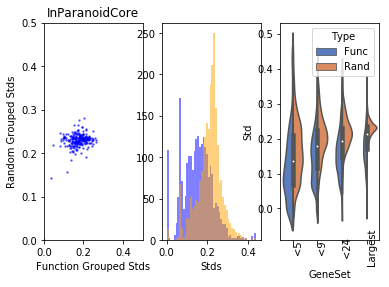

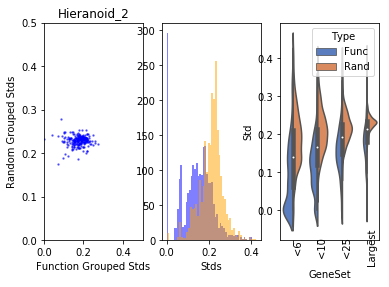

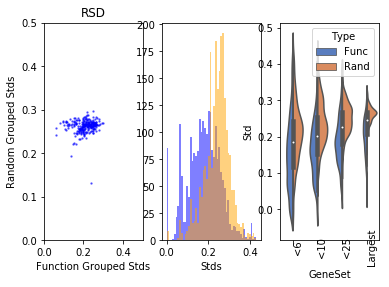

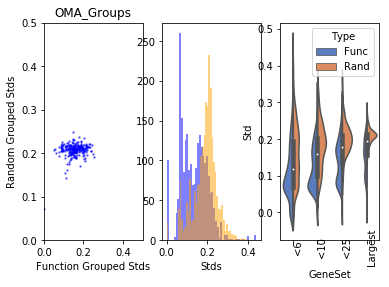

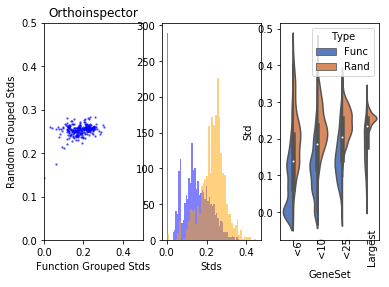

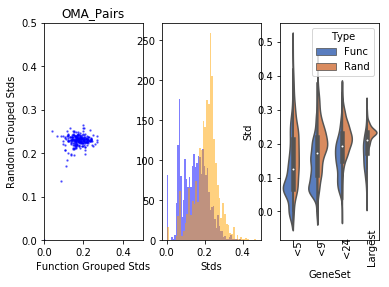

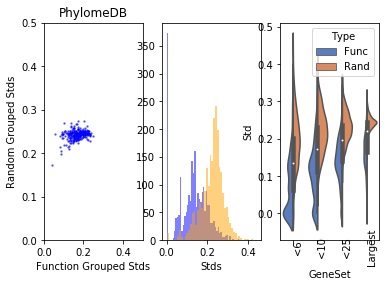

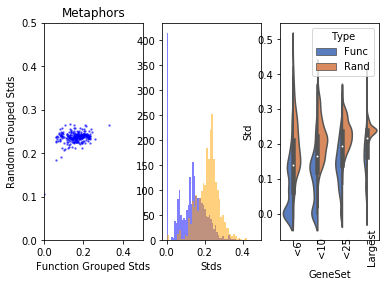

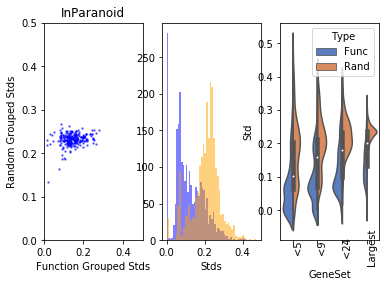

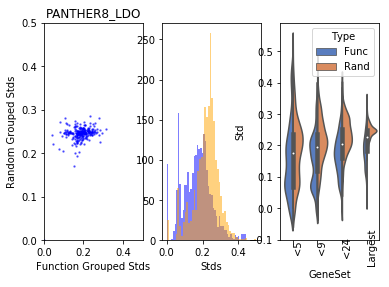

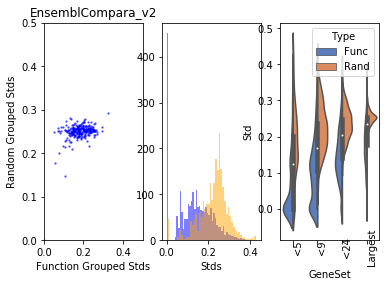

In [3]:
rows = len(dataset_list)
for i in xrange(0,rows):
    ax_lists = [None,None,None]
    fig, ax_lists = plt.subplots(1, 3 , sharex=False, sharey=False)
    
    dataset = dataset_list[i]
    print dataset
    ax_lists[0].set_title(dataset)
    prelim_fig_funcs.figure1(ax_lists[0],lens_dict[dataset],stds_dict[dataset], rand_stds_dict[dataset])
    prelim_fig_funcs.figure2(ax_lists[1],stds_dict[dataset], rand_stds_dict[dataset])
    prelim_fig_funcs.figure4(ax_lists[2],lens_dict[dataset],stds_dict[dataset], rand_stds_dict[dataset])
    plt.savefig("figures/different_datasets_figures_table_%s.png"%dataset,dpi=600)
    